#Instructions for Google Colab


Open Google Colab (https://colab.research.google.com/).

.
**Create a new notebook**

**Copy and paste the code above into a code cell.**

**Run the cell (Shift + Enter).**

**The code will**:
Generate simulated sales and product data.


**Add features like time-based, lagged, and profit calculations.**

**Validate the data for integrity.**

**Display five visualizations (daily sales trend, profit by category, price vs. quantity, sales by hour, profit distribution).**

**Print a sample of the processed data.**

**Notes**

**Dependencies**: Colab comes with pandas, numpy, matplotlib, and seaborn pre-installed, so the code should run without additional setup.


**Output**: Graphs will display inline in the notebook, and the data sample will print below the visualizations.


**Customization**: You can adjust figsize, colors, or add more plots by modifying the visualize_data function (e.g., change sns.set_style("whitegrid") to "darkgrid" for a different look).


**Saving Plots**: To save plots, add plt.savefig('plot_name.png', dpi=300, bbox_inches='tight') before plt.show() in the visualize_data function.


/tmp/ipython-input-2-2835542145.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'timestamp': pd.to_datetime(pd.date_range('2023-01-01', periods=num_records, freq='H')),
/tmp/ipython-input-2-2835542145.py:51: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  df[['price_lag_1', 'quantity_sold_lag_1']] = df.groupby('product_id')[['price_lag_1', 'quantity_sold_lag_1']].fillna(method='ffill')
/tmp/ipython-input-2-2835542145.py:51: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['price_lag_1', 'quantity_sold_lag_1']] = df.groupby('product_id')[['price_lag_1', 'quantity_sold_lag_1']].fillna(method='ffill')


Data validation passed.
Generating Visualizations...


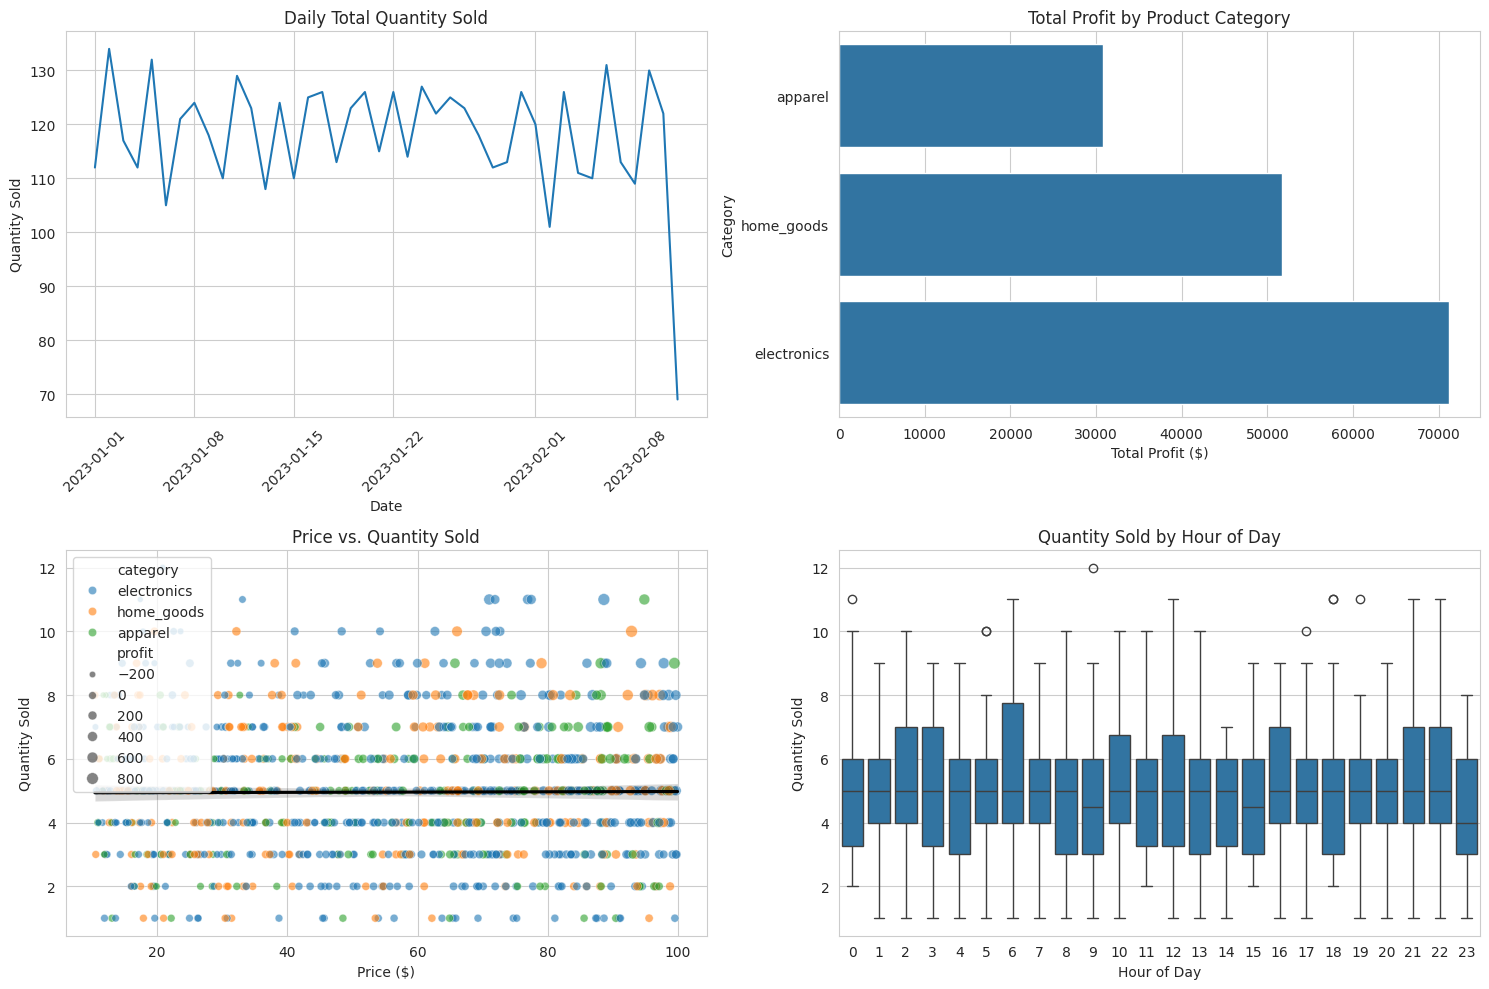

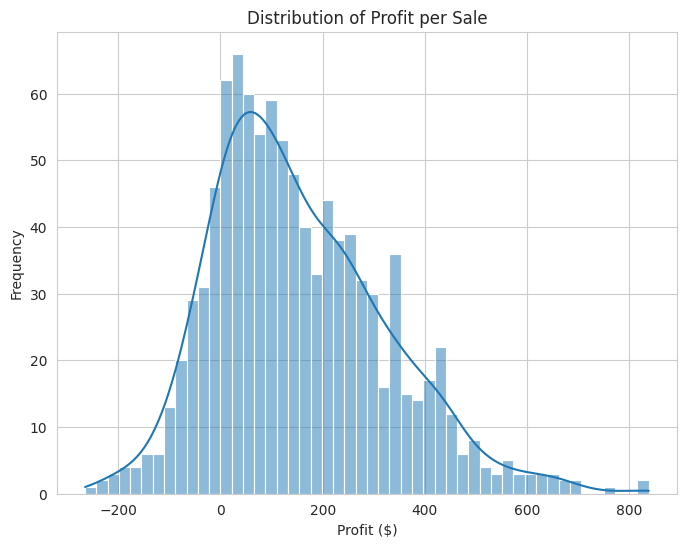


Processed Sales Data Sample:
   product_id           timestamp  price  quantity_sold  customer_id   cost  \
0         107 2023-01-01 00:00:00  30.80              6         1121  41.46   
1         104 2023-01-01 01:00:00  70.47              5         1068  28.12   
2         108 2023-01-01 02:00:00  11.77              5         1025  11.08   
3         105 2023-01-01 03:00:00  19.37              2         1176  15.42   
4         107 2023-01-01 04:00:00  81.99              3         1160  41.46   

      category  hour  day_of_week  is_weekend  month  price_lag_1  \
0  electronics     0            6           1      1          NaN   
1  electronics     1            6           1      1          NaN   
2   home_goods     2            6           1      1          NaN   
3      apparel     3            6           1      1          NaN   
4  electronics     4            6           1      1         30.8   

   quantity_sold_lag_1  price_ma_3  profit  
0                  NaN      30.800 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
sns.set_style("whitegrid")

def simulate_sales_data(num_records=1000, seed=42):
    """Simulate historical sales data."""
    np.random.seed(seed)
    data = {
        'product_id': np.random.randint(101, 110, num_records),
        'timestamp': pd.to_datetime(pd.date_range('2023-01-01', periods=num_records, freq='H')),
        'price': np.random.uniform(10, 100, num_records).round(2),
        'quantity_sold': np.random.poisson(5, num_records).clip(1),
        'customer_id': np.random.randint(1001, 1200, num_records)
    }
    return pd.DataFrame(data)

def simulate_product_data():
    """Simulate product data."""
    product_data = {
        'product_id': np.arange(101, 110),
        'cost': np.random.uniform(5, 50, 9).round(2),
        'category': np.random.choice(['electronics', 'apparel', 'home_goods'], 9)
    }
    return pd.DataFrame(product_data)

def add_features(df, products_df):
    """Add time-based, lagged, and interaction features."""
    df = df.merge(products_df[['product_id', 'cost', 'category']], on='product_id', how='left')

    # Time-based features
    df['hour'] = df['timestamp'].dt.hour
    df['day_of_week'] = df['timestamp'].dt.dayofweek
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    df['month'] = df['timestamp'].dt.month

    # Product-specific lagged features
    df['price_lag_1'] = df.groupby('product_id')['price'].shift(1)
    df['quantity_sold_lag_1'] = df.groupby('product_id')['quantity_sold'].shift(1)

    # Product-specific moving average
    df['price_ma_3'] = df.groupby('product_id')['price'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)

    # Profit feature
    df['profit'] = (df['price'] - df['cost']) * df['quantity_sold']

    # Handle missing values
    df[['price_lag_1', 'quantity_sold_lag_1']] = df.groupby('product_id')[['price_lag_1', 'quantity_sold_lag_1']].fillna(method='ffill')
    df['price_ma_3'] = df['price_ma_3'].fillna(df['price'])

    return df

def validate_data(df):
    """Validate data integrity."""
    assert (df['price'] > 0).all(), "Negative or zero prices detected."
    assert (df['quantity_sold'] > 0).all(), "Non-positive quantities detected."
    print("Data validation passed.")

def visualize_data(df):
    """Generate visualizations for sales data analysis."""
    # Set up figure layout
    plt.figure(figsize=(15, 10))

    # 1. Sales Trend Over Time (Daily Total Quantity Sold)
    plt.subplot(2, 2, 1)
    daily_sales = df.groupby(df['timestamp'].dt.date)['quantity_sold'].sum()
    daily_sales.plot()
    plt.title('Daily Total Quantity Sold')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.xticks(rotation=45)

    # 2. Profit by Product Category (Bar Plot)
    plt.subplot(2, 2, 2)
    category_profit = df.groupby('category')['profit'].sum().sort_values()
    sns.barplot(x=category_profit.values, y=category_profit.index)
    plt.title('Total Profit by Product Category')
    plt.xlabel('Total Profit ($)')
    plt.ylabel('Category')

    # 3. Price vs. Quantity Sold (Scatter Plot with Regression Line)
    plt.subplot(2, 2, 3)
    sns.scatterplot(data=df, x='price', y='quantity_sold', hue='category', size='profit', alpha=0.6)
    sns.regplot(data=df, x='price', y='quantity_sold', scatter=False, color='black')
    plt.title('Price vs. Quantity Sold')
    plt.xlabel('Price ($)')
    plt.ylabel('Quantity Sold')

    # 4. Sales by Hour of Day (Box Plot)
    plt.subplot(2, 2, 4)
    sns.boxplot(data=df, x='hour', y='quantity_sold')
    plt.title('Quantity Sold by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Quantity Sold')

    plt.tight_layout() # to adjust spacing between subplots
    plt.show()

    # Additional Plot: Distribution of Profit
    plt.figure(figsize=(8, 6))
    sns.histplot(df['profit'], bins=50, kde=True)
    plt.title('Distribution of Profit per Sale')
    plt.xlabel('Profit ($)')
    plt.ylabel('Frequency')
    plt.show()

# Main Pipeline
if __name__ == "__main__":
    # Generate and process
    sales_df = simulate_sales_data()
    products_df = simulate_product_data()
    sales_df = add_features(sales_df, products_df)
    validate_data(sales_df)

    # Visualize
    print("Generating Visualizations...")
    visualize_data(sales_df)

    # Display sample data
    print("\nProcessed Sales Data Sample:")
    print(sales_df.head())